## Modelos de Regressão ##

### Regressão Linear ###

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Criar dois vetores aleatórios de 100 valores cada
x = 2 * np.random.rand(100,1)

# y deve ter relação linear com x com algumas distorções (que é a parte do np.random.randn(100,1))

y = 1 + 3 * x + np.random.randn(100,1) 
# f(x) = (1 + random) + (3 * x)
# 1 + random representa o intercepto theta0
# 3 representa o coeficiente theta1

# Criar um frame com proporções 20:7
fig, ax = plt.subplots(figsize=(20,7))

# Plotar os vetores em um gráfico de dispersão
plt.scatter(x,y)

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [71]:
# A função c_ do numpy serve pra concatenar vetores em novas colunas
# No caso, estamos concatenando o vetor x com um novo vetor de 100 vezes o valor int "1"
# Agora teremos duas colunas, uma com valores "1" e outra com os valores aleatórios de x
x_b = np.c_[np.ones((100,1)), x] # Exemplo: array([[1.        , 1.23030745],

In [72]:
"""
A função abaixo pode parecer complexa, porém representa apenas a função de calculo dos parâmetros theta abaixo
Theta = (X transposta * X)^(-1) * X transposta * Y
A potência - ocorre na função "linalg.inv"
"""
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

"""
Definir a matriz y_hat (simulação de y) como a primeira coluna de theta (theta0 ou intercepto)
mais x multiplicado pela segunda coluna de theta (theta1 ou coeficiente)

ŷ = θ + x * θ¹
"""
y_hat = theta[0] + x * theta[1]
theta

array([[0.94243822],
       [2.96176741]])

array([[0.94243822],
       [2.96176741]])

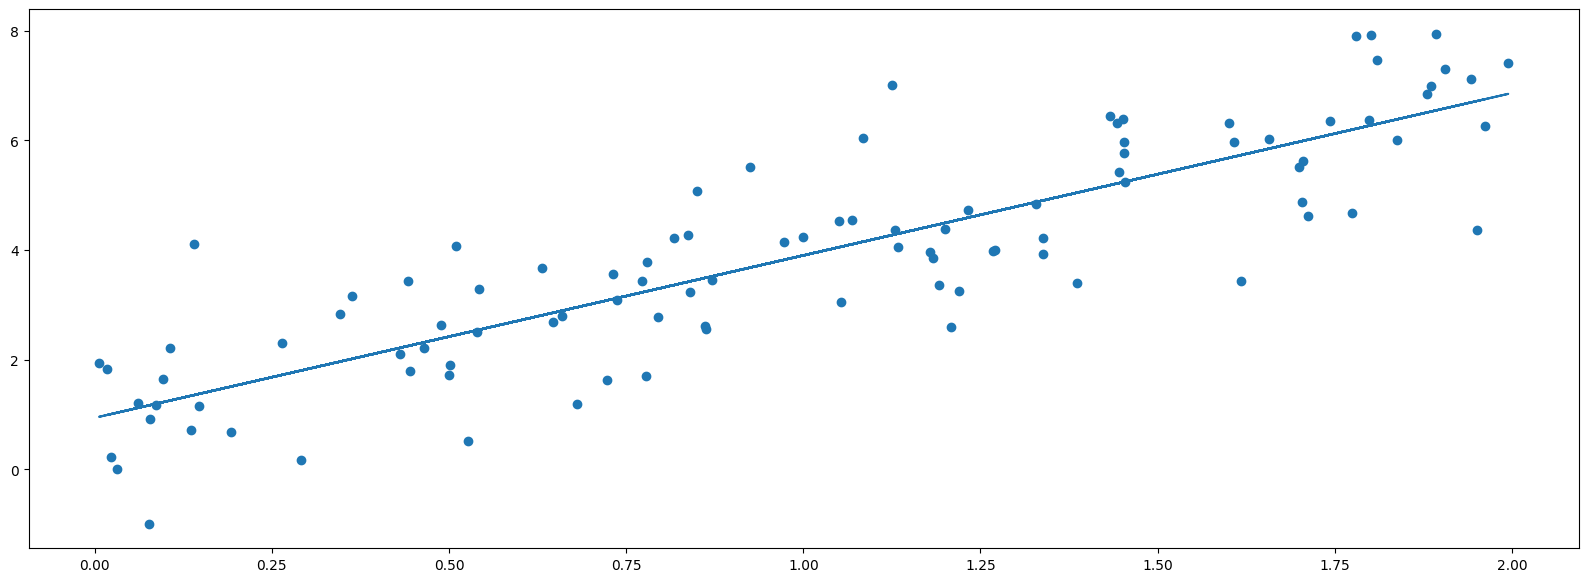

In [73]:
# No gráfico abaixo podemos ver a regressão linear
fig, ax = plt.subplots(figsize=(20,7))
plt.plot(x, y_hat)
plt.scatter(x,y)

theta

### Gradient Descent ###

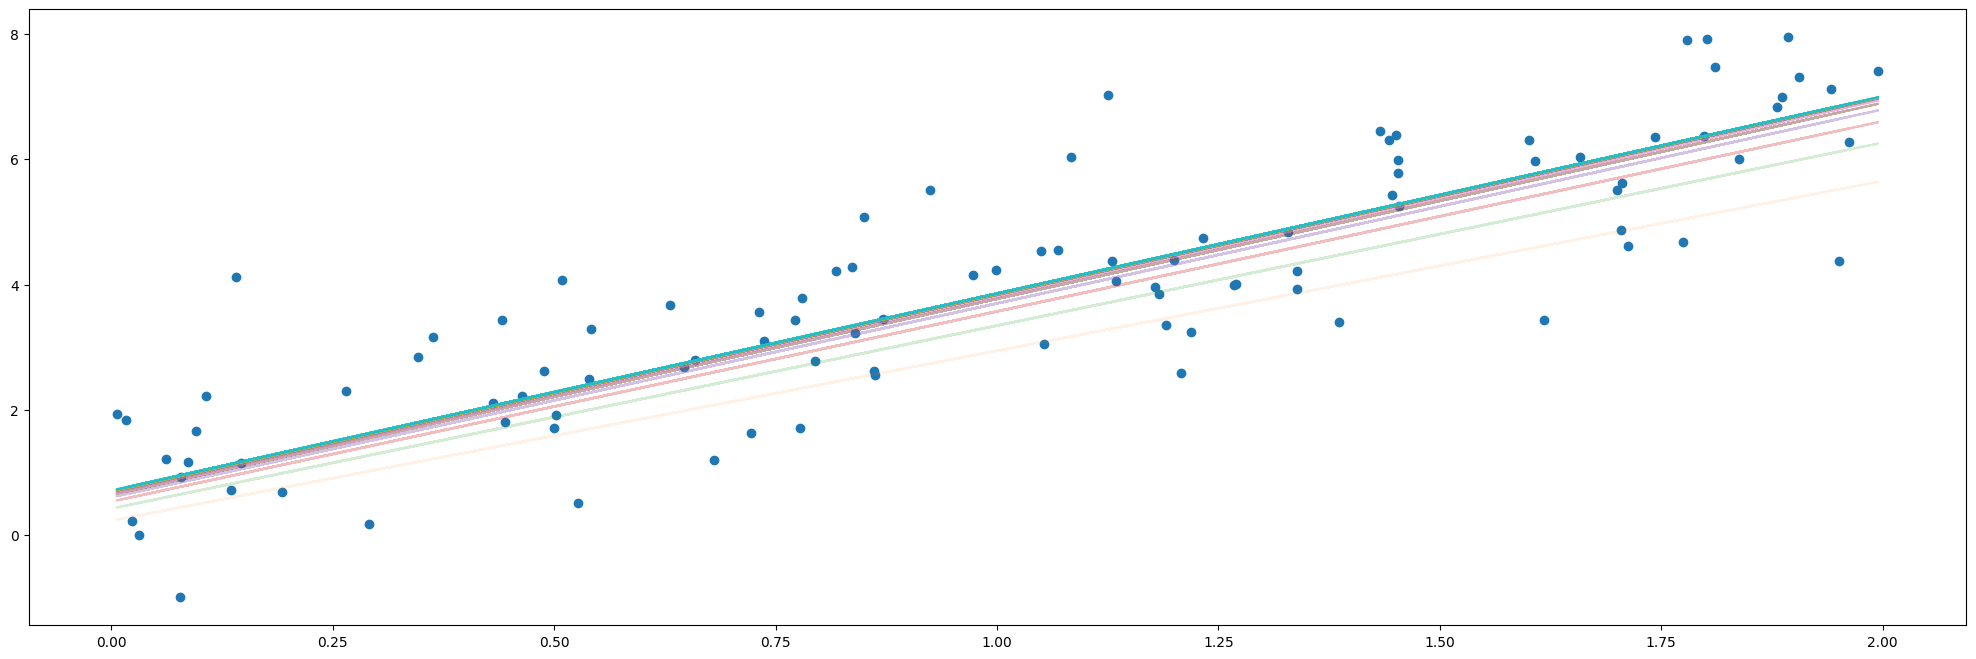

In [74]:
# Definir a taxa de aprendizado em 0.1
eta = 0.1

# Número de iterações do gradiente descendente
n_iterations = 10

# Número de amostras
m = 100

# Inicializar os parâmetros aleatoriamente
theta = np.random.randn(2,1)

# Criar um gráfico de dispersão para os dados com proporção 25:8
fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(x, y)

# Loop de gradiente descendente
for iteration in range(n_iterations):
    # Calcular os gradientes
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    
    # Atualizar os parâmetros theta
    theta = theta - eta * gradients
    
    # Calcular os valores previstos (y_hat)
    y_hat = theta[0] + x * theta[1]
    
    # Adicionar a linha de regressão ao gráfico
    ax.plot(x, y_hat, alpha=0 + iteration / n_iterations)

## Regressão Polinomial ##

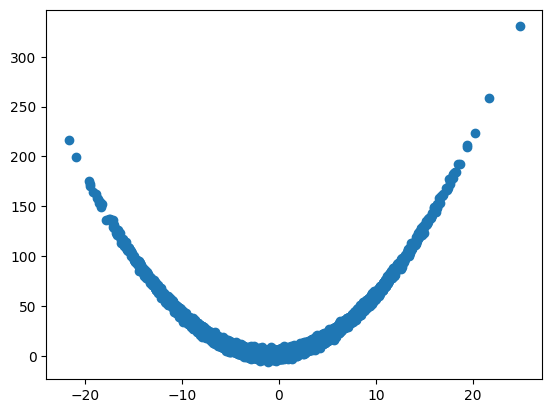

In [75]:
m = 10000
x = 6 * np.random.randn(m,1)

# Aqui a função polinomial se organiza da seguinte maneira:
# (x²/2) + x + 2 + 2*random
y = 0.5 * x ** 2 + x + 2 + 2 * np.random.randn(m,1)
plt.scatter(x,y)

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias=False)

x_poly = poly_features.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[1.96912542]
[[ 1.00500170e+00  4.99925846e-01 -1.12366255e-05]]


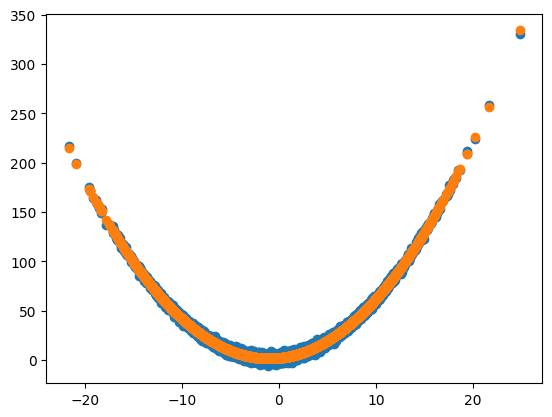

In [97]:
plt.scatter(x,y)
plt.scatter(x, lin_reg.predict(x_poly))